# Random Forest Classifier 

## Content   <a name="content"></a>

1. [Load data](#1)
2. [ML with all features. Choosing the algorithm](#2)
3. [ML with all features. Random Forest Classfier](#3)
4. [Comparison between three methods that determine the feature importance](#4)
5. [Hyper-parameter tuning of the model with the reduced features](#5)
6. [Cross validation of the model with the reduces number of features](#6)
7. [Confusion matrix and classification report](#7)
8. [Check for overfitting](#8)
9. [Demo](#9)

In [1]:
# pip install pandas
# pip install missingno
# pip install rdkit
# pip install chemformula
# pip install tables
# pip install imbalanced-learn

## Load data <a name="1"></a>

In [2]:
import pandas as pd 

# load the BioAssay PubChem AID 504332 dataset
df = pd.read_csv('data_classification_rus.csv', index_col=[0])

# To avoid truncation of some columns during data frame display
pd.set_option('display.max_columns', None) 

# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (7842, 61)


,Solubility_at_pH_7_4,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,target
0,34.8,304.21,150.0,21.2,22,2,6,2,1,7.7905,11.1683,20.225059,19.870654,7.5071,8.7071,20.223854,20.025772,138.857919,1.823199e+00,8.6722,11.7401,19.774833,20.109492,3.3909,5.8836,18.925785,19.862012,2.1920,4.3119,20.385883,20.271977,262.816832,20.059119,20.365473,20.052413,0.40,0.27,0.20,0.00,0.13,0.0,0.0,0.0,47.38,2.65,31.55,0.00,18.42,0.0,0.0,0.0,21.037751,21.282666,2.557492,1.995394,3.956296,2.722721,1.546943,1.364503,20.052,1
1,0.2,329.35,86.0,19.0,24,1,7,4,1,9.0790,10.1348,20.126147,20.044148,7.9483,8.5535,20.019830,20.040667,0.212597,1.504653e-03,11.3257,13.6537,20.236775,20.086972,5.7367,7.4114,19.831307,19.820174,1.9981,3.9069,20.602469,20.249765,55.381007,20.239452,20.662942,20.234332,0.40,0.44,0.09,0.00,0.07,0.0,0.0,0.0,62.00,5.81,19.43,0.00,12.76,0.0,0.0,0.0,21.142257,21.184872,1.974253,1.842257,5.668235,3.494766,2.871078,1.897003,20.054,1
2,51.9,365.40,93.2,22.7,25,2,6,9,1,14.0394,14.0394,19.920211,19.883106,13.2046,13.2046,19.979395,20.038913,0.000000,1.947578e-09,12.9825,14.8338,19.926837,19.893779,6.2555,8.0131,20.498119,20.254099,2.7905,4.8992,20.560288,20.344985,47.078573,20.169483,20.265337,20.387918,0.38,0.48,0.10,0.02,0.02,0.0,0.0,0.0,59.16,6.34,21.89,8.77,3.83,0.0,0.0,0.0,21.063220,21.063220,2.075374,1.851194,4.652392,3.027800,2.241713,1.635594,20.075,0
3,0.2,350.40,83.4,24.1,26,1,6,6,1,13.2855,13.2855,20.212669,20.258219,12.4368,12.4368,20.081220,20.106381,0.000000,3.248901e-10,16.1077,18.1714,19.861794,19.857083,5.6146,7.3151,19.090154,19.532925,2.6331,4.4309,19.817598,19.854004,39.804223,20.031235,20.098375,20.012328,0.43,0.41,0.07,0.00,0.09,0.0,0.0,0.0,65.13,5.18,13.70,0.00,15.99,0.0,0.0,0.0,21.068241,21.068241,2.868895,2.484095,6.117390,4.101063,2.132316,1.650929,20.057,1
4,37.7,293.32,57.0,22.7,22,0,4,5,1,10.8167,10.8167,20.109434,19.945708,6.9926,7.3477,19.907574,20.220041,0.000131,1.491913e-06,11.0157,13.0965,20.558186,20.326659,5.5449,7.0859,20.751874,20.668313,2.2596,3.8580,20.050414,20.026005,26.268598,20.211597,20.198079,20.045648,0.46,0.41,0.05,0.00,0.08,0.0,0.0,0.0,69.61,5.15,10.91,0.00,14.33,0.0,0.0,0.0,21.546878,21.472121,1.986636,1.848248,4.875066,3.394635,2.453930,1.836677,20.042,0


In [3]:
df.describe(include="all")

,Solubility_at_pH_7_4,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,target
count,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.0,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7.842000e+03,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7.842000e+03,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.00000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000
mean,25.150612,300.854150,76.806785,22.665238,21.057128,1.232849,4.197781,3.787554,1.0,9.744999,10.378795,20.025280,20.024549,8.302468,8.866526,19.948416,19.974057,7.213502,4.366700e-02,10.342796,12.378686,20.012784,20.014430,4.666254,6.681783,19.994347,19.997397,2.350471,4.099217,19.996214,19.994634,6.060737e+01,20.417476,20.815510,20.760243,0.413689,0.421163,0.061640,0.014691,0.07646,0.001106,0.005580,0.005060,60.795641,5.307446,11.784983,5.326144,12.787869,0.828502,2.091729,1.077692,21.407960,21.345030,2.471547,1.946587,161.828067,43.971155,72.730235,24.392041,20.057615,0.500000
std,17.923805,45.053646,29.197828,1.115433,3.354504,0.876860,1.537535,1.766357,0.0,2.903622,2.763105,0.299460,0.266176,2.930530,2.769433,0.368477,0.301343,43.962615,2.469153e-01,2.428765,2.371746,0.320800,0.261967,1.468419,1.393579,0.446916,0.293438,1.087463,1.271857,0.585245,0.405482,7.183353e+01,1.334984,11.951492,11.690826,0.045106,0.064242,0.039959,0.020165,0.03942,0.006374,0.014957,0.018131,9.185305,1.459503,7.192720,6.882539,6.047777,4.543630,5.303831,3.605986,0.905580,0.709430,1.084129,0.605442,1261.215447,465.309983,615.173377,277.118198,0.017489,0.500032
min,0.100000,87.080000,3.200000,16.300000,6.000000,0.000000,0.000000,0.000000,1.0,1.963500,2.605200,18.762913,19.073882,0.750000,1.950000,18.543130,18.928861,0.000000,2.260095e-38,2.145400,4.065400,18.534780,19.024054,0.394700,3.024900,17.450587,18.886292,0.000100,0.000500,16.830497,14.612511,3.807599e-07,20.000073,20.000000,20.000000,0.170000,0.100000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,20.830000,0.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.158514,20.158514,0.576067,0.728110,1.002917,0.908398,0.260297,0.683794,20.011000,0.000000
25%,5.700000,273.330000,56.600000,21.900000,19.000000,1.000000,3.000000,3.000000,1.0,7.660700,8.577000,19.838891,19.859719,6.166500,6.759800,19.712910,19.772889,0.000000,2.842306e-06,8.661275,10.712175,19.819025,19.848613,3.532425,5.600175,19.726547,19.818275,1.720075,3.451475,19.738971,19.831889,2.676389e+01,20.053631,20.039891,20.038881,0.380000,0.380000,0.030000,0.000000,0.05000,0.000000,0.000000,0.000000,54.812500,4.290000,5.842500,0.000000,8.640000,0.000000,0.000000,0.000000,20.818968,20.836958,1.663739,1.480358,3.193116,2.354414,1.452085,1.308307,20.047000,0.000000
50%,27.800000,304.335000,74.900000,22.700000,21.000000,1.000000,4.000000,4.000000,1.0,9.429600,10.131150,20.008541,20.007079,8.231600,8.752550,19.947343,19.973154,0.082481,2.700315e-04,10.234150,12.238400,20.007158,20.015858,4.586450,6.550500,19.996349,19.999999,2.437050,4.303900,19.999750,19.999239,4.288814e+01,20.143544,20.106057,20.103512,0.420000,0.420000,0.060000,0.000000,0.07000,0.000000,0.000000,0.000000,61.220000,5.220000,11.180000,0.000000,12.240000,0.00000

[<a href="#content">Back to top</a>]

## ML with all features. Choosing the algorithm  <a name="2"></a>

In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['target'], axis=1)
y = df['target']

# Split the data set into train and test parts 
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=5) 
# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (6273, 60)
X_test:   (1569, 60)
y_train:  (6273,)
y_test:   (1569,)


In [5]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Instantiate the algorithms that will be used, placing them in a dictionary 
clfs = {"SVM":SVC(kernel='rbf', C=1, probability=True),
        "Decision":DecisionTreeClassifier(), 
        "RandomForest":RandomForestClassifier(), 
        "GradientBoost":GradientBoostingClassifier(),
        "XGBoost":XGBClassifier(verbosity=0) }

In [6]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

# Create statistics with the results of training with different algorithms
def model_fit(clfs):
    fitted_model={}
    model_result = pd.DataFrame()
    # Iterate the clfs dictionary clfs
    for model_name, model in clfs.items():
        # Train the current model
        model.fit(X_train,y_train)
        # Add the current model name
        fitted_model.update({model_name:model})
        # Prediction of the current model 
        y_pred = model.predict(X_test)
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        # Calculate the metrics
        model_dict['2.Accuracy'] = round(accuracy_score(y_test, y_pred),3)
        model_dict['3.Precision'] = round(precision_score(y_test, y_pred),3)
        model_dict['4.Recall'] = round(recall_score(y_test, y_pred),3)
        model_dict['5.F1'] = round(f1_score(y_test, y_pred),3)
        model_dict['6.ROC'] = round(roc_auc_score(y_test, y_pred),3)
        model_result = model_result._append(model_dict,ignore_index=True)
    return fitted_model, model_result

# Run the function model_fit(clfs) 
fitted_model, model_result = model_fit(clfs)

# Display the results of the model_fit(clfs) function in a descending order
model_result.sort_values(by=['2.Accuracy'],ascending=False)

,1.Algorithm,2.Accuracy,3.Precision,4.Recall,5.F1,6.ROC
2,RandomForest,0.642,0.653,0.608,0.630,0.642
3,GradientBoost,0.638,0.644,0.617,0.630,0.638
0,SVM,0.634,0.646,0.593,0.618,0.634
4,XGBoost,0.619,0.621,0.608,0.615,0.619
1,Decision,0.560,0.557,0.583,0.570,0.560


In [7]:
# Cross validation
from sklearn.model_selection import cross_val_score
import numpy as np

# Create statistics with the results of the cross-validation of different estimators
def model_CV(clfs):
    estimated_model={}
    model_cv_result = pd.DataFrame()
    for model_name, model in clfs.items():
        estimated_model.update({model_name:model})
       # scoring = ['precision_macro', 'recall_macro']
        model.fit(X_train,y_train)
        scores = cross_val_score(model, X, y, cv=5)
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        model_dict['2.Mean CV Score'] = round(scores.mean(), 4)
        model_dict['3.Standard Deviation'] = round(scores.std(), 4)
        model_dict['4.List of CV Scores'] = np.round(scores, 4)
        model_cv_result = model_cv_result._append(model_dict,ignore_index=True)
    return estimated_model, model_cv_result

# Run the model_CV(clsf) function
estimated_model, model_cv_result = model_CV(clfs)

# Display the results of cross_validation statistics in a descending order
model_cv_result.sort_values(by=['2.Mean CV Score'],ascending=False)

,1.Algorithm,2.Mean CV Score,3.Standard Deviation,4.List of CV Scores
3,GradientBoost,0.6473,0.0098,"[0.6565, 0.6322, 0.6575, 0.6397, 0.6505]"
4,XGBoost,0.6445,0.0043,"[0.6444, 0.6456, 0.639, 0.6518, 0.6416]"
2,RandomForest,0.6421,0.0060,"[0.6488, 0.6361, 0.6409, 0.6492, 0.6352]"
1,Decision,0.5625,0.0051,"[0.5704, 0.559, 0.5612, 0.5561, 0.5657]"
0,SVM,0.5437,0.0065,"[0.5341, 0.5398, 0.5536, 0.5446, 0.5466]"


In [8]:
import matplotlib.pyplot as plt

# Check for overfitting 
# Evaluate random forest classifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = RandomForestClassifier(max_depth=i)
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.594, test: 0.565
>2, train: 0.605, test: 0.577
>3, train: 0.627, test: 0.590
>4, train: 0.639, test: 0.604
>5, train: 0.672, test: 0.606
>6, train: 0.706, test: 0.619
>7, train: 0.748, test: 0.608
>8, train: 0.803, test: 0.621
>9, train: 0.849, test: 0.618
>10, train: 0.895, test: 0.619
>11, train: 0.939, test: 0.619
>12, train: 0.965, test: 0.630
>13, train: 0.981, test: 0.632
>14, train: 0.988, test: 0.623
>15, train: 0.997, test: 0.621
>16, train: 0.999, test: 0.630
>17, train: 1.000, test: 0.639
>18, train: 1.000, test: 0.632
>19, train: 1.000, test: 0.625
>20, train: 1.000, test: 0.622


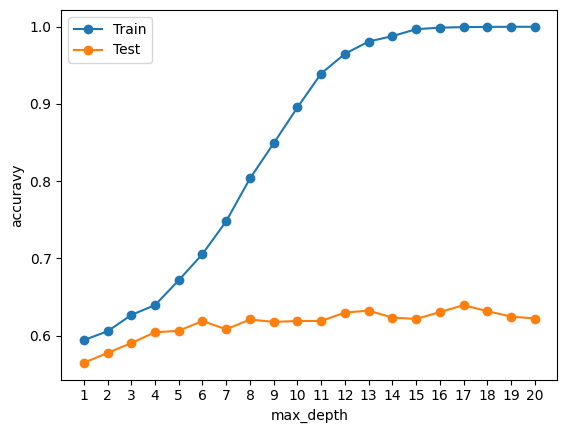

In [9]:
import math
import matplotlib.pyplot as plt

# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

[<a href="#content">Back to top</a>]

## ML with all features. Random Forest Classifier <a name="3"></a>

In [10]:
# Instantiate the estimator 
model = RandomForestClassifier(random_state=1, max_depth=3)
#  Train the model
model.fit(X_train, y_train)
# Make a prediction
prediction = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, prediction)
print("The accuracy of the model with Random forest classifier algorithm is: ", accuracy)

The accuracy of the model with Random forest classifier algorithm is:  0.5959209687699172


[<a href="#content">Back to top</a>]